## Dresslar CAS522 M5 Notebook


*Please note: this notebook will not run fully without its shared source code. If the loading function abve fails, the shared code can be downloaded from the specified location to a local folder accessible to the runtime of the notebook.*

### Markov Chain foundations

I continue to have difficulties working with the Pyvis library in VSCode. However, perhaps the good news is that by converting the code to work with the Python networkx library, I will gain a better understanding. Let's go ahead and reimplement the didactic material from the lesson notebook.

{('0', '0'): Text(-0.9874270894934849, 0.3880534496275804, '1'),
 ('0', '1'): Text(-0.6598132554239965, 0.05375445051508548, '0.33'),
 ('1', '2'): Text(-0.006284632625407127, -0.17194951750585588, '0.67'),
 ('2', '1'): Text(-0.006288277881107307, -0.1719501089255118, '0.33'),
 ('2', '3'): Text(0.6598163495950979, -0.0537543658084845, '0.67'),
 ('3', '3'): Text(1.000000000000001, 0.06727903798875928, '1')}

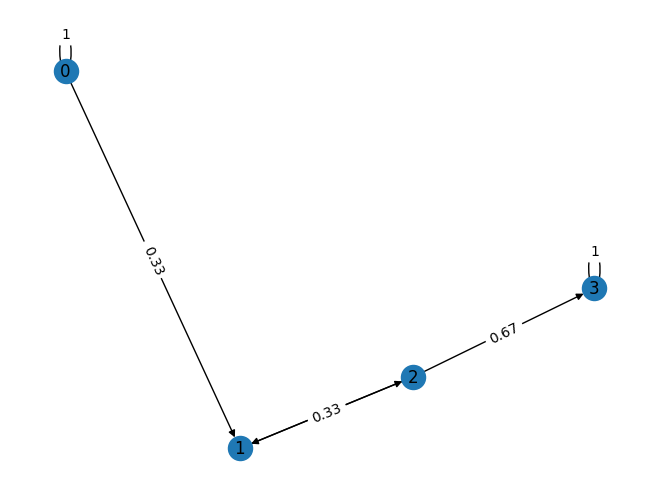

In [201]:
import networkx as nx
import numpy as np
import sympy as sp

# draw a markov chain
# https://networkx.org/documentation/stable/reference/classes/digraph.html#networkx.DiGraph

G = nx.DiGraph()

# add nodes

G.add_node('0')
G.add_node('1')
G.add_node('2')
G.add_node('3')

G.add_edge('0', '0', weight=1)
G.add_edge('0', '1', weight=1/3)
G.add_edge('1', '2', weight=2/3)
G.add_edge('2', '1', weight=1/3)
G.add_edge('2', '3', weight=2/3)
G.add_edge('3', '3', weight=1)

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos) 
edge_labels = nx.get_edge_attributes(G, 'weight')
# we need to round those edge labels to 2 decimal places
edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


Okay, this seems acceptable. The remainder of the example code from the notebook should work more or less as presented.

Probability of absorption to node 3 upon reaching node 1: 0.571428571428571
Probability of absorption to node 3 upon reaching node 2: 0.857142857142857


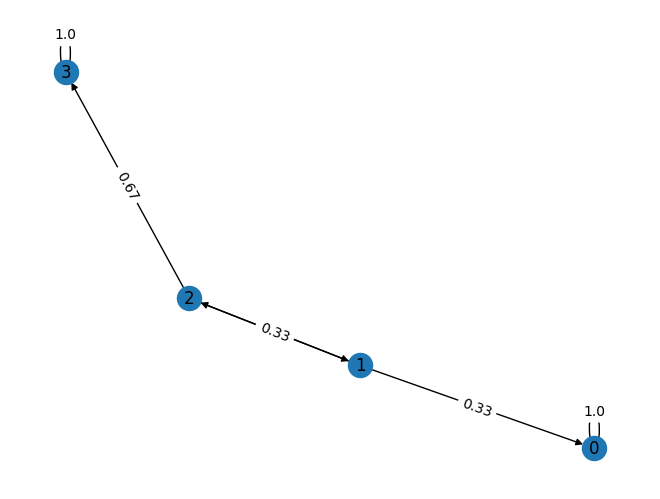

In [202]:
def absorbing_markov_chain_1(P):

    a = sp.symbols('a:4')
    solution = sp.solve(np.dot(P,a)-a, (a[1],a[2]))
    s1 = solution[a[1]].subs({a[0]:0,a[3]:1})
    s2 = solution[a[2]].subs({a[0]:0,a[3]:1})
    return s1, s2

P = np.array([
    [1,0,0,0],
    [1/3,0,2/3,0],
    [0,1/3,0,2/3],
    [0,0,0,1]
])
s1, s2 = absorbing_markov_chain_1(P)

# print(type(s1), type(s2))
# <class 'sympy.core.numbers.Float'> <class 'sympy.core.numbers.Float'>

# we can also use networkx to visualize the absorbing markov chain from the matrix
G = nx.from_numpy_array(P, create_using=nx.DiGraph)

# drwaing again
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos) 
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

print(f"Probability of absorption to node 3 upon reaching node 1: {s1}")
print(f"Probability of absorption to node 3 upon reaching node 2: {s2}")



The visualization along with the text should be fairly illustrative.

### Assignment

> Consider the Gambler's Ruin problem studied in class, where a more skilled player 1 is twice as likely than player 2 to win a game. Player 1 starts with $1, while player 2 starts with $2. Each game gives the winner $1 from the other, and the players play until one of them is bankrupt. We have seen that player 1 has a probability equal to 4/7 (approximately 57%) of winning.

> Modify the dynamics assuming that player 1 gets tired more quickly than player 2, and that this reduces their chances of winning the game. As before, player 1 is 200% more likely to win than player 2 during the first game, but only 150% more likely during the second game. The odds are even during the third game. During the fourth game, player 1 is only 50% as likely as player 2 to win. If the players get to play a fifth game, the stress on player 1 becomes unbearable. At this point player 1 just concedes their games.

> Question: Can you redefine the states of this system in a way that makes a Markov chain approach still viable? What is the new probability that player 1 wins?

The answer to the question is yes: one possible implementation appears below. Note that the "tricky" aspect of implementing this answer is to think carefully about all the actually reachable states. **The probability of player 1 winning is 0.4444** (when considering just the starting state of the system) in this modified problem. The updated probabilities upon reaching the transition states appear in the output below the following code:

Probability of absorption to node 5 upon reaching node 1 [start condition.]: 0.4444
Probability of absorption to node 5 upon reaching node 2: 0.1667
Probability of absorption to node 5 upon reaching node 3: 0.6667
Probability of absorption to node 5 upon reaching node 4: 0.3333


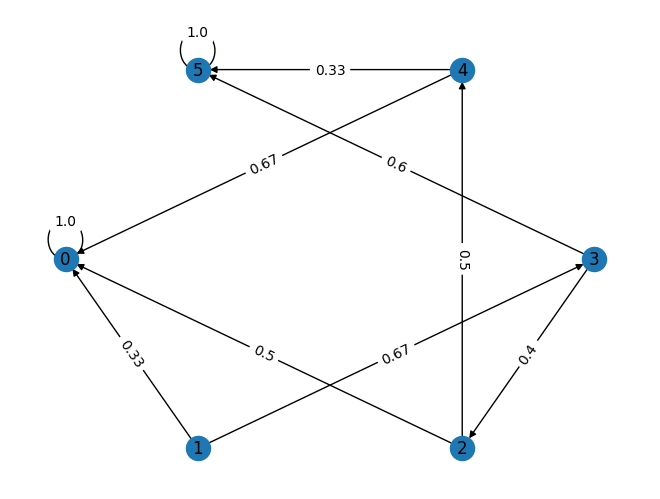

In [203]:
# This is somewhat reminiscent of the HTH coin flip problem from the wikipedia page on absorbing markov chains.
# https://en.wikipedia.org/wiki/Absorbing_Markov_chain#Example:_HTH_coin_flips

# in the initial problem, we had four possible states: (see the class video!)

# 1. Player 1 has 0, Player 2 has 3
# 2. Player 1 has 1, Player 2 has 2
# 3. Player 1 has 2, Player 2 has 1
# 4. Player 1 has 3, Player 2 has 0

# In the new problem, turn number can be expressed as a component of our states. (there is surely a better way to communicate this.)
# We can list these and omit any impossible variations.
# The resulting matrix is not so big as we might expect.

#0. Player 1 has 0, Player 2 has 3, and turn does not matter.
#1. Player 1 has 1, Player 2 has 2, and it is the first turn.
#2. Player 1 has 1, Player 2 has 2, and it is the third turn.
#3. Player 1 has 2, Player 2 has 1, and it is the second turn.
#5. Player 1 has 2, Player 2 has 1, and it is the fourth turn.
#6. Player 1 has 3, Player 2 has 0, and the turn number does not matter.


def absorbing_markov_chain_2(P):

    a = sp.symbols('a:6')
    solution = sp.solve(np.dot(P,a)-a, (a[1], a[2], a[3], a[4])) # the four transitions
    s1 = solution[a[1]].subs({a[0]:0,a[5]:1})   # boundary (win) is position 5
    s2 = solution[a[2]].subs({a[0]:0,a[5]:1})
    s3 = solution[a[3]].subs({a[0]:0,a[5]:1})
    s4 = solution[a[4]].subs({a[0]:0,a[5]:1})

    # print(type(s1), type(s2), type(s3), type(s4))
    # <class 'sympy.core.numbers.Float'> <class 'sympy.core.numbers.Float'> <class 'sympy.core.numbers.Float'> <class 'sympy.core.numbers.Float'>

    # convert sympy floats and round to 4 decimal places
    # see https://docs.sympy.org/latest/modules/evalf.html (ugh.)
    s1 = round(float(sp.N(s1, 12)), 4)
    s2 = round(float(sp.N(s2, 12)), 4)
    s3 = round(float(sp.N(s3, 12)), 4)
    s4 = round(float(sp.N(s4, 12)), 4)

    return s1, s2, s3, s4

P1 = np.array([
    [1,0,0,0,0,0],
    [1/3,0,0,2/3,0,0],    # 1st turn 200% more likely
    [1/2,0,0,0,1/2,0],    # 3rd turn even odds
    [0,0,2/5,0,0,3/5],    # 2nd turn 150% more likely
    [2/3,0,0,0,0,1/3],    # 4th turn 50% less likely
    [0,0,0,0,0,1]        
])

s1, s2, s3, s4 = absorbing_markov_chain_2(P1)

G1 = nx.from_numpy_array(P1, create_using=nx.DiGraph)
# drwaing again
pos = nx.shell_layout(G1)
nx.draw(G1, with_labels=True, pos=pos) 
edge_labels = nx.get_edge_attributes(G1, 'weight')
edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G1, pos=pos, edge_labels=edge_labels)

print(f"Probability of absorption to node 5 upon reaching node 1 [start condition.]: {s1}")
print(f"Probability of absorption to node 5 upon reaching node 2: {s2}")
print(f"Probability of absorption to node 5 upon reaching node 3: {s3}")
print(f"Probability of absorption to node 5 upon reaching node 4: {s4}")
